In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [4]:
# def load_and_plot(filename, temp):
#     data = pd.read_csv(filename, delim_whitespace=True)
#     print(f"Available columns in {filename}:")
#     print(data.columns.tolist())  # This will show us the actual column names
    
#     # Comment out these lines temporarily
#     # V = data['VOLT1']
#     # I = data['CURR1']
#     # plt.plot(V, I, label=f'{temp}°C')
#     return data  # Return the full dataframe for inspection
def load_and_plot(filename, temp):
    data = pd.read_csv(filename, delim_whitespace=True)
    
    V = data['VOLT1']
    I = data[',CURR1']  # Added comma before CURR1
    
    plt.plot(V, I, label=f'{temp}°C')
    return V, I  # Return V and I instead of data

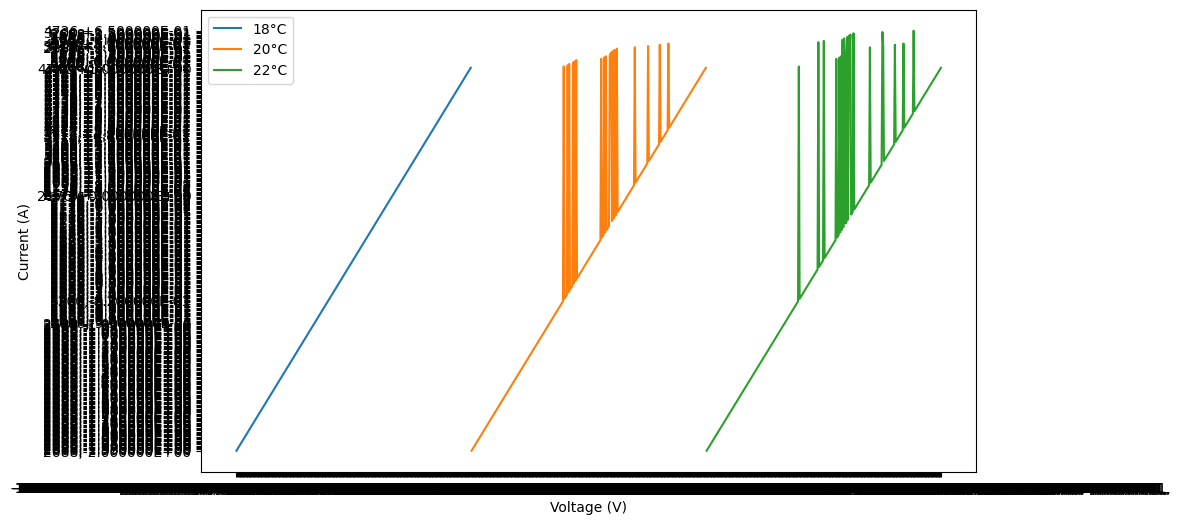

In [5]:
plt.figure(figsize=(10, 6))
V18, I18 = load_and_plot('Dark18.csv', 18)
V20, I20 = load_and_plot('Dark20.csv', 20)
V22, I22 = load_and_plot('Dark22.csv', 22)
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.legend()
plt.show()

In [6]:
def diode_equation(V, I0, n, Rs):
    k = 1.380649e-23  # Boltzmann constant (J/K)
    q = 1.602176634e-19  # Elementary charge (C)
    T = 273.15 + temp  # Convert Celsius to Kelvin
    return I0 * (np.exp(q * V / (n * k * T)) - 1) + Rs

def fit_diode_model(V, I):
    # Initial guess for parameters: I0, n, Rs
    initial_guess = [1e-12, 1, 0]
    params, _ = curve_fit(diode_equation, V, I, p0=initial_guess)
    return params

# Fit data for each temperature
I0_18, n_18, Rs_18 = fit_diode_model(V18, I18)
I0_20, n_20, Rs_20 = fit_diode_model(V20, I20)
I0_22, n_22, Rs_22 = fit_diode_model(V22, I22)

print(f'I0 at 18°C: {I0_18}')
print(f'I0 at 20°C: {I0_20}')
print(f'I0 at 22°C: {I0_22}')


ValueError: could not convert string to float: '2688,-2.000000E+00'

In [10]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Load CSV
data = pd.read_csv('Dark18.csv', delim_whitespace=True)

# Define solar cell model
def solar_cell_model(V, I_s, n, R_s, R_p):
    q = 1.602e-19  # Elementary charge
    k = 1.381e-23  # Boltzmann constant
    T = 293  # Example: 20°C in Kelvin
    return I_s * (np.exp(q * (V + R_s) / (n * k * T)) - 1) + (V + R_s) / R_p

# Fit data
V = data['VOLT1']
I = data[',CURR1']
initial_guess = [1e-10, 1.5, 0.01, 1000]  # Adjust initial guesses
params, _ = curve_fit(solar_cell_model, V, I, p0=initial_guess)

I_s, n, R_s, R_p = params
print(f"I_s: {I_s}, n: {n}, R_s: {R_s}, R_p: {R_p}")

# Plot
plt.plot(V, I, 'o', label='Data')
plt.plot(V, solar_cell_model(V, *params), label='Fit')
plt.legend()
plt.show()

# Calculate W_g
temperatures = np.array([18, 20, 22]) + 273  # Temperatures in Kelvin
I_s_values = []  # List of I_s at different temperatures
# Populate I_s_values by repeating the above fitting for each temperature
T_inv = 1 / temperatures
ln_Is_T3 = np.log(np.array(I_s_values) / temperatures**3)
coeffs = np.polyfit(T_inv, ln_Is_T3, 1)
W_g = -coeffs[0] * k
print(f"W_g: {W_g} eV")


ValueError: could not convert string to float: '2688,-2.000000E+00'